# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Using Grade 8 Math, 

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.isna().sum()["AVG_MATH_8_SCORE"]

np.int64(1113)

In [85]:
# Remove columns without average grade 8 math score, since that is what we're training
df.dropna(subset="AVG_MATH_8_SCORE", inplace=True)

In [86]:
df.isna().sum()["AVG_MATH_8_SCORE"]

np.int64(0)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [87]:
# @@@ 1
# Your Code
df.nunique()["YEAR"]

np.int64(13)

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [88]:
# @@@ 2
bystate = df.groupby("STATE")
df["STATE"].unique()
print("Michigan average: ", bystate["AVG_MATH_8_SCORE"].mean()["MICHIGAN"])
print("Ohio average: ", bystate["AVG_MATH_8_SCORE"].mean()["OHIO"])

Michigan average:  276.1666666666667
Ohio average:  282.25


Find the average for your chosen test across all states in 2019

In [9]:
# @@@ 3
by_yr = df.groupby("YEAR")
print(by_yr["AVG_MATH_8_SCORE"].mean()[2019])

281.2641509433962


For each state, find a maximum value for your chosen test score

In [10]:
# @@@ 4
bystate["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
# @@@ 5
df["EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"]/df["ENROLL"]
df["TOTAL_PROFIT"] = df["TOTAL_REVENUE"] - df["TOTAL_EXPENDITURE"]
df["PROFIT_MARGIN"] = df["TOTAL_PROFIT"]/df["TOTAL_REVENUE"]

Feature engineering justification: The expenditure per student is useful because how much a school spends on instruction can affect the scores of the student. The profit margin is also important because it shows how much of the revenue goes back into improving the education.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Average Math Score vs. Profit Margin of a State')

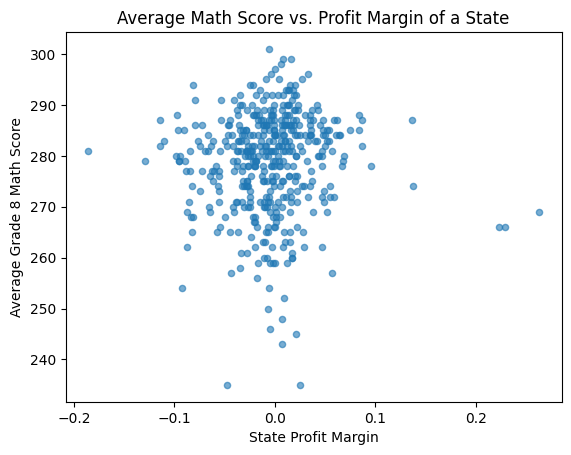

In [65]:
# @@@ 6
df.plot.scatter(x="PROFIT_MARGIN", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel('State Profit Margin')
plt.ylabel("Average Grade 8 Math Score")
plt.title("Average Math Score vs. Profit Margin of a State")

There is no clear correlation between the profit margin and the average grade 8 math score.

**Visualization 2**

Text(0.5, 1.0, 'Average Math Score with respect to Expenditure')

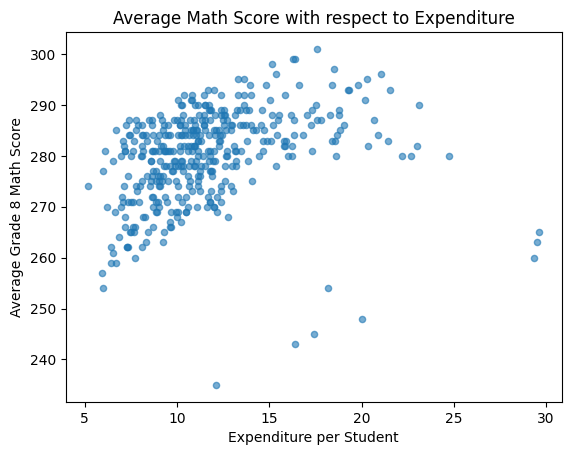

In [89]:
# @@@ 7
df.plot.scatter(x="EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel('Expenditure per Student')
plt.ylabel("Average Grade 8 Math Score")
plt.title("Average Math Score with respect to Expenditure")

In general, the more a state expends per student, the higher the average grade 8 math score. That is, there is a positive correlation between expenditure per student and average grade 8 math score. There are some outliers, but they are few as compared to the amount of data that supports a correlation. It also is not as strong a correlation as with the average grade 8 reading score, as we saw in the tutorial.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split

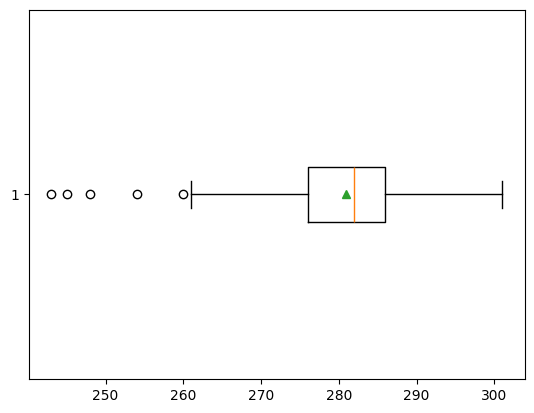

In [75]:
# @@@ 8

X = df[['EXPENDITURE_PER_STUDENT','AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

# Fill NaN in y with median
# Median chosen because there are some outliers, which will significantly affect the mean but not the median
# This can be seen in the following boxplot:
y2 = y.dropna()
plt.boxplot(y2, orientation='horizontal', showmeans=True)
plt.show()

# As we can see, the data is skewed right, and the outliers affect the mean greatly
# So the median is a better filling metric here
y.fillna(y.median(), inplace=True)

In [90]:
# @@@ 9 
# Choose 80-20 split, and a pre-specified random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [70]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [91]:
# @@@ 11
# create your model here
# Seems like a linear relationship, so we will use linear regression
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [80]:
# @@@ 12
# Let's use R^2 score, mean absolute error, and RMS error
# R^2 score
print(model.score(X_test, y_test))
# mean absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))
# RMS error
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.9202596979565362
1.6572056717122858
2.066494069210247


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0, 0.5, 'Average Grade 8 Math Score')

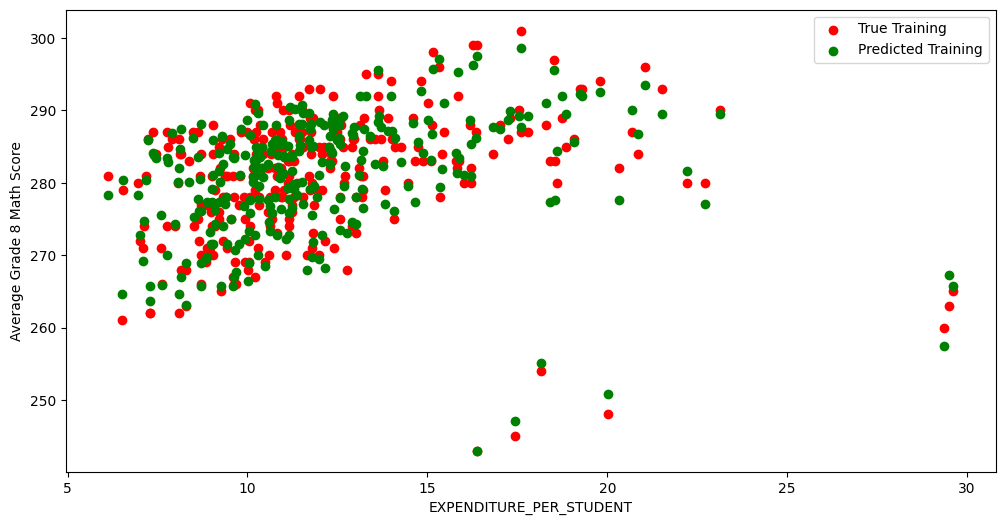

In [83]:
# @@@ 13

col_name = 'EXPENDITURE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 8 Math Score')
# plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

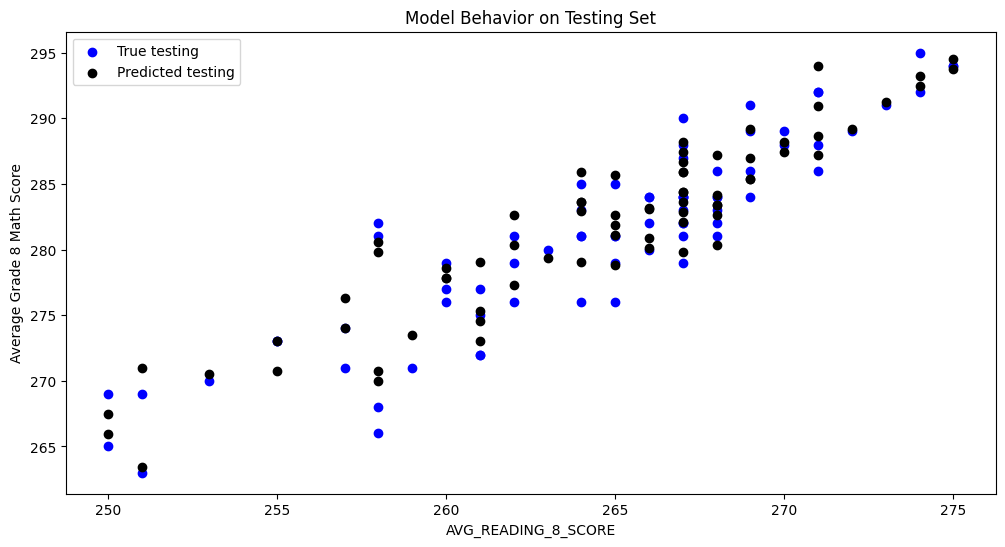

In [84]:
# @@@ 14


col_name = 'AVG_READING_8_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 8 Math Score')
plt.title("Model Behavior on Testing Set")